# Extracting data and saving it to a new file

This exercise walks you through how to read csv-data, select certain data using selection rules and saving selected data into a new file.

First import the packages needed and then read and save the data from file *DoubleMuRun2011.csv* into variable *dataset*. Let's also check out the number of rows and the content of the file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
dataset = pd.read_csv('../Data/DoubleMuRun2011A.csv')
print("The file has %d rows."% len(dataset))
dataset.head()

The file has 475465 rows.


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


Plot a histogram of the invariant masses using the whole dataset.

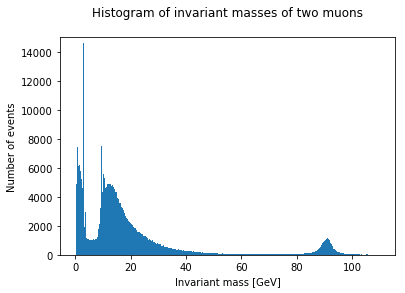

In [3]:
plt.hist(dataset['M'], bins=500, range=(0,110))

axes = plt.gca()
axes.set_ylim([0,15000])

# Name the axis and set a title
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant masses of two muons\n') # \n creates a new line for making the title look better

# Show the plot.
plt.show()

Histogram shows multiple peaks from which we are interested in the one on the right. Let's choose the rows from the original data that hae invariant mass values between 70 < M < 110 and save these into variable *peakdata*. We can also check how many rows of data fill these conditions.

In [4]:
peakdata = dataset[(dataset.M>70) & (dataset.M<110)] #Z
len(peakdata)

33177

We can now easily plot a histogram for invariant masses of the selected data.

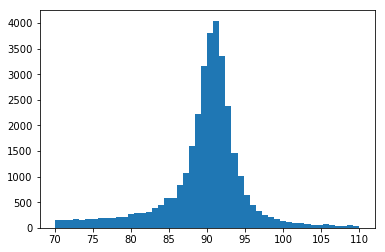

In [5]:
inv_mass = peakdata['M']
plt.hist(inv_mass, bins=50)
plt.show()

The selected conditions for data seem applicable but let's check the minimum and maximum values for invariant mass in our selected data. This way we can make sure that our conditions hold.

In [6]:
minimum = min(peakdata['M'])
maximum = max(peakdata['M'])
print("The smallest value of invariant mass is %f and the greatest is %f in selected data." %(minimum,maximum))

The smallest value of invariant mass is 70.006900 and the greatest is 109.999000 in selected data.


We see that our conditions hold so let's save the data in *peakdata* into a csv-file and name it *peak.csv*. We can leave out the original indices but it's good to keep the original column titels. The created file will be saved in the same folder with the notebook.

In [7]:
peakdata.to_csv('peak.csv',index=False,header=True)

We can make sure that we managed to save the data we wanted by reading the file *peak.csv* and printing the first five rows of it.

In [8]:
test = pd.read_csv('peak.csv')
test.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74969122,G,59.9226,-46.15160,29.4115,-24.4070,54.7266,-0.432382,2.574210,...,G,52.4465,30.10970,-16.39890,-39.68760,34.2859,-0.988511,-0.498717,-1,89.9557
1,165617,75138253,G,97.1011,-23.61440,6.6660,-93.9497,24.5372,-2.052350,2.866470,...,G,30.5992,-11.61340,-25.98480,11.23470,28.4619,0.385137,-1.991090,1,88.6081
2,165617,75887636,G,152.9720,7.46565,-30.7098,-149.6710,31.6042,-2.259260,-1.332320,...,G,33.5835,-9.28778,28.74570,-14.67190,30.2089,-0.468368,1.883310,1,88.2438
3,165617,75833588,G,181.8770,44.14270,-14.9498,175.8040,46.6055,2.037920,-0.326545,...,G,170.0210,-34.63010,12.32480,166.00000,36.7579,2.212820,2.799670,-1,83.0943
4,165617,75779415,G,50.2440,37.80720,-12.2044,-30.7590,39.7283,-0.712422,-0.312246,...,G,49.2396,-47.60640,8.23376,-9.50613,48.3132,-0.195513,2.970330,-1,90.3544
